In [1]:
%config InlineBackend.figure_formats = {'png', 'retina'}
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### 손글씨 분류 모델 만들기

In [ ]:
# 1. 데이터 로드

In [2]:
from sklearn import datasets

In [3]:
mnist = datasets.load_digits() # 8 * 8 이미지, 1797개

In [ ]:
# 2. 데이터 전처리

In [4]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [5]:
print(len(mnist["data"]))

data = mnist["data"][0]
print(data)

# 원래의 행렬 데이터로 변환
img = data.reshape(8, 8)
img

1797
[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]


array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

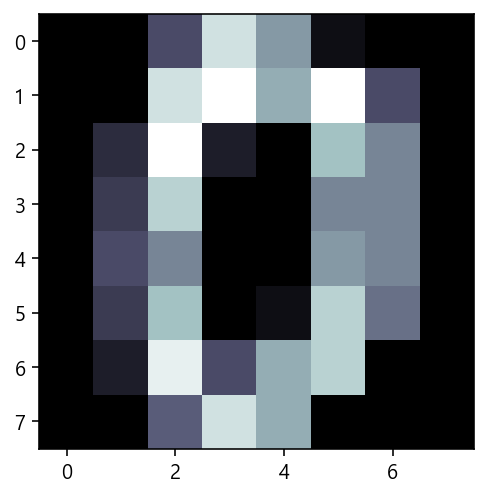

In [6]:
# 이미지 출력
plt.imshow(img, cmap=plt.cm.bone)
plt.show()

In [ ]:
# mnist.data[1000:1002], mnist.target[1000:1002]

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
train_x, test_x, train_y, test_y = train_test_split(
    mnist.data, mnist.target, test_size=0.3, random_state=0)

In [ ]:
# 3. 모델 학습 : svm : linear, rbf

In [9]:
from sklearn.svm import SVC

In [10]:
linear_model = SVC( kernel="linear").fit(train_x, train_y)

In [32]:
# gamma='auto' -> 1/n_features

rbf_model1 = SVC(kernel="rbf", gamma=1, C=10).fit(train_x, train_y)

In [33]:
rbf_model2 = SVC(kernel="rbf", gamma=1, C=100).fit(train_x,train_y)

In [34]:
rbf_model3 = SVC(kernel="rbf", gamma=0.5, C=10).fit(train_x,train_y)

In [70]:
rbf_model4 = SVC(kernel="rbf", gamma=0.001, C=10).fit(train_x,train_y)

In [36]:
rbf_model5 = SVC(kernel="poly", gamma='auto',degree=10, C=10).fit(train_x,train_y)

In [37]:
rbf_model6 = SVC(kernel="poly", gamma='auto', degree=10, C=100).fit(train_x,train_y)

In [79]:
# gamma = 0.1 ~ 1.0
# C = 0.1 ~ 10
# kernel = linear, ploy, rbf
# poly-degree = 3 ~ 10
kernel_list = ['poly', 'rbf']
degree_list = list(range(4, 11, 1))
gamma_list = np.arange(0.1, 1, 0.1)

result_dict = {}
ct=0
for kernel in kernel_list:
    if kernel == 'poly':
        for degree in degree_list:
            model = SVC(degree=degree, kernel=kernel)
            model.fit(train_x, train_y)
            score = model.score(test_x, test_y)
            result_dict[ct] = {'degree': degree, 'score': score}
            print(result_dict)
    else:
        for gamma in gamma_list:
            model = SVC(gamma=gamma, kernel=kernel)
            model.fit(train_x, train_y)
            score = model.score(test_x, test_y)
            result_dict[ct] = {'gamma': gamma, 'score': score}
            print(result_dict)
    ct += 1

{0: {'degree': 4, 'score': 0.9833333333333333}}
{0: {'degree': 5, 'score': 0.9777777777777777}}
{0: {'degree': 6, 'score': 0.9796296296296296}}
{0: {'degree': 7, 'score': 0.9703703703703703}}
{0: {'degree': 8, 'score': 0.9666666666666667}}
{0: {'degree': 9, 'score': 0.9629629629629629}}
{0: {'degree': 10, 'score': 0.9592592592592593}}
{0: {'degree': 10, 'score': 0.9592592592592593}, 1: {'gamma': 0.1, 'score': 0.09444444444444444}}
{0: {'degree': 10, 'score': 0.9592592592592593}, 1: {'gamma': 0.2, 'score': 0.08888888888888889}}
{0: {'degree': 10, 'score': 0.9592592592592593}, 1: {'gamma': 0.30000000000000004, 'score': 0.08888888888888889}}
{0: {'degree': 10, 'score': 0.9592592592592593}, 1: {'gamma': 0.4, 'score': 0.08888888888888889}}
{0: {'degree': 10, 'score': 0.9592592592592593}, 1: {'gamma': 0.5, 'score': 0.08888888888888889}}
{0: {'degree': 10, 'score': 0.9592592592592593}, 1: {'gamma': 0.6, 'score': 0.08888888888888889}}
{0: {'degree': 10, 'score': 0.9592592592592593}, 1: {'gamma

In [12]:
# 4. 모델 평가

In [71]:
linear_score = linear_model.score(test_x, test_y)
rbf_score = rbf_model4.score(test_x, test_y)
linear_score, rbf_score

(0.9740740740740741, 0.9907407407407407)

In [ ]:
#rbf_model -> gamma, C -> 5개 모델 학습

In [ ]:
# c : 10 : 0.99259 > 과적합확인
# c : 1 : 0.99074
# c : 0.1 : 0.9481

In [ ]:
# 5. 모델 사용

In [ ]:
import PIL.Image as pil

sample_data = pil.open("./imgs/data_1.png")
sample_data

In [ ]:
# 이미지 사이즈를 8 * 8로 축소

In [ ]:
data1 = sample_data.resize((8, 8))
data1

In [ ]:
# 흑백 이미지로 변경

In [ ]:
np.array(data1).shape

In [ ]:
data2 = np.array(data1).mean(axis=2)
data2.shape

In [ ]:
# 흑백 전환 : 양각 > 음각

In [ ]:
plt.figure(figsize=(2, 1))
plt.imshow(data2, cmap=plt.cm.bone)
plt.show()

In [ ]:
data3 = np.ones(data2.shape) * 255 - data2
data3

In [ ]:
plt.figure(figsize=(2, 1))
plt.imshow(data3, cmap=plt.cm.bone)
plt.show()

In [ ]:
# 색상범위 256 > 16

In [ ]:
data4 = np.round(data3 / 16)
data4

In [ ]:
rbf_model.predict(data4.reshape(1, -1))